In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_parquet('/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5/train_final.parquet')
test = pd.read_parquet('/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5/test_final.parquet')
sample_submission = pd.read_parquet('/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5/submission_sample_final.parquet')

In [ ]:
def delete_duplicate_ids(data, col_name = "id"):
  print(f"{data} Shape before deleting duplicate ids : {data.shape}")
  same_ids = data[data.duplicated(col_name, keep = False)]
  delete_id = same_ids[col_name].iloc[0]
  data = data[data[col_name] != delete_id]
  print(f"{data} Shape after deleting duplicate ids: {data.shape}")

In [ ]:
delete_duplicate_ids(train)

                              id  month  n_seconds_1  n_seconds_2  \
0      5beefd4d2bf4a4767e0df8108     10     5245.571      981.182   
1      867285b116c063d5a8482f5be     10     5184.876      557.650   
2      c82a7cbd2e00d9b66c06bcadc     10     3835.618     3275.128   
3      f2d2b25073ccc298eced86897     10     3532.544      154.509   
4      7818c92a58af0f2cb7c361738     10     3344.192      787.896   
...                          ...    ...          ...          ...   
94044  2e54f32ced9fae6ef802ceaa2     12       44.397       43.425   
94045  6aa4ff0f6cc5ef4c2980b2862     12       44.331       43.977   
94046  fa842185a0edd210845b78308     12       44.142       43.591   
94047  db8f55b8499f8d8c05148240e     12       43.963       43.350   
94048  93c3b8ecbb3071cf0a925a860     12       41.850       41.429   

       n_seconds_3       carrier devicebrand  feature_0  feature_1  feature_2  \
0          205.948   VODAFONE TR       Apple  -1.197737   1.113360  -1.123334   
1        

In [ ]:
def train_carrier_arrange(data):
  print(data['carrier'].value_counts())

  data.loc[data['carrier'].str.contains('TURKCELL'), 'carrier'] = 'TURKCELL'
  data.loc[data['carrier'].str.contains('VODAFONE'), 'carrier'] = 'VODAFONE'
  data.loc[data['carrier'].str.contains('TURK TELEKOM'), 'carrier'] = 'TURK TELEKOM'
  data.loc[data['carrier'].str.contains('BIMCELL'), 'carrier'] = 'BIMCELL'
  data.loc[data['carrier'].str.contains('KKTCELL'), 'carrier'] = 'KKTCELL'
  data.loc[data['carrier'].str.contains('HAYATEVESIGAR'), 'carrier'] = 'HAYATEVESIGAR'
  data.loc[data['carrier'].str.contains('TEKNOSACELL'), 'carrier'] = 'TEKNOSACELL'
  data.loc[data['carrier'].str.contains('PTTCELL'), 'carrier'] = 'PTTCELL'
  data.loc[data['carrier'].str.contains('LIFECELL'), 'carrier'] = 'LIFECELL'
  data.loc[data['carrier'].str.contains('FENERCELL'), 'carrier'] = 'FENERCELL'

  value_counts = data['carrier'].value_counts()
  data['carrier'] = data['carrier'].apply(lambda x: 'RARE' if value_counts[x] < 200 else x)

  print(data['carrier'].value_counts())


In [ ]:
train_carrier_arrange(train)

TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
BIMCELL          1108
Unknown           684
                ...  
MOBILIS             1
AF AWCC             1
SMART               1
REGLO MOBILE        1
BELALIM             1
Name: carrier, Length: 556, dtype: int64
TURKCELL         39150
VODAFONE         26424
TURK TELEKOM     22123
RARE              2419
BIMCELL           1110
Unknown            684
KKTCELL            659
HAYATEVESIGAR      559
TEKNOSACELL        498
PTTCELL            423
Name: carrier, dtype: int64


In [ ]:
def test_carrier_arrange(data):
  print(data['carrier'].value_counts())

  data.loc[data['carrier'].str.contains('TURKCELL'), 'carrier'] = 'TURKCELL'
  data.loc[data['carrier'].str.contains('VODAFONE '), 'carrier'] = 'VODAFONE'
  data.loc[data['carrier'].str.contains('TURK TELEKOM'), 'carrier'] = 'TURK TELEKOM'
  data.loc[data['carrier'].str.contains('BIMCELL'), 'carrier'] = 'BIMCELL'

  value_counts = data['carrier'].value_counts()
  data['carrier'] = data['carrier'].apply(lambda x: 'RARE' if value_counts[x] < 200 else x)

  print(data['carrier'].value_counts())

In [ ]:
test_carrier_arrange(test)

TURKCELL        4787
VODAFONE TR     3206
TURK TELEKOM    2959
BIMCELL          161
Unknown          105
                ... 
VIRGIN             1
FLOW               1
GULER              1
中国移动               1
VODAFONE NL        1
Name: carrier, Length: 169, dtype: int64
TURKCELL        4801
VODAFONE        3283
TURK TELEKOM    2964
RARE             907
Name: carrier, dtype: int64


In [ ]:
def train_devicebrand_arrange(data):
  print(data['devicebrand'].value_counts())

  data.loc[data['devicebrand'].str.contains('HUAWEI'), 'devicebrand'] = 'Huawei'
  data.loc[data['devicebrand'].str.contains('GM | generalmobile'), 'devicebrand'] = 'General Mobile'
  data.loc[data['devicebrand'].str.contains('CASPER | casper'), 'devicebrand'] = 'Casper'
  data.loc[data['devicebrand'].str.contains('realme'), 'devicebrand'] = 'Realme'
  data.loc[data['devicebrand'].str.contains('reeder'), 'devicebrand'] = 'Reeder'

  value_counts = data['devicebrand'].value_counts()
  data['devicebrand'] = data['devicebrand'].apply(lambda x: 'RARE' if value_counts[x] < 200 else x)

  print(data['devicebrand'].value_counts())

In [ ]:
train_devicebrand_arrange(train)

Apple         33238
samsung       31971
Redmi          7709
HUAWEI         6595
xiaomi         5300
              ...  
Cat               1
HOMETECH          1
WIKO              1
Gigaset           1
blackshark        1
Name: devicebrand, Length: 64, dtype: int64
Apple      33238
samsung    31971
Redmi       7709
Huawei      6600
xiaomi      5300
OPPO        3247
RARE        1419
POCO         989
GM           770
Realme       578
lge          442
TECNO        296
Casper       278
HONOR        264
Vestel       261
vivo         239
Reeder       232
Sony         216
Name: devicebrand, dtype: int64


In [ ]:
def test_devicebrand_arrange(data):
  print(data['devicebrand'].value_counts())

  data.loc[data['devicebrand'].str.contains('HUAWEI'), 'devicebrand'] = 'Huawei'

  value_counts = data['devicebrand'].value_counts()
  data['devicebrand'] = data['devicebrand'].apply(lambda x: 'RARE' if value_counts[x] < 200 else x)

  print(data['devicebrand'].value_counts())

In [ ]:
test_devicebrand_arrange(test)

samsung          4134
Apple            3986
Redmi            1036
HUAWEI            908
xiaomi            679
OPPO              449
POCO              117
GM                 95
realme             71
lge                57
Vestel             39
HONOR              39
TECNO              37
Casper             35
vivo               32
gm                 32
Lenovo             29
reeder             27
Sony               25
OnePlus            21
asus               19
TCL                17
OMIX               13
Nokia              10
Infinix             8
google              7
Meizu               5
motorola            4
Huawei              4
Realme              4
htc                 3
Alcatel             2
ZTE                 2
DOOGEE              1
nubia               1
generalmobile       1
HTC                 1
CASPER              1
OUKITEL             1
Turk_Telekom        1
TURKCELL            1
HiKING              1
Name: devicebrand, dtype: int64
samsung    4134
Apple      3986
Redmi      1

In [ ]:
train['ios'] = (train['devicebrand'] == 'Apple').astype(int)
train['android'] = (train['devicebrand'] != 'Apple').astype(int)

test['ios'] = (test['devicebrand'] == 'Apple').astype(int)
test['android'] = (test['devicebrand'] != 'Apple').astype(int)

In [ ]:

def data_analysis(dataframe):
    print("########## HEAD ##########")
    print(dataframe.head())
    print("########## TAIL ##########")
    print(dataframe.tail())
    print("########## SHAPE ##########")
    print(dataframe.shape)
    print("########## DTYPES ##########")
    print(dataframe.dtypes)
    print("########## ISNA ##########")
    print(dataframe.isna().sum())
    print("########## INFO ##########")
    print(dataframe.info())
    print("########## DESCRIBE ##########")
    print(dataframe.describe())

In [ ]:
data_analysis(train)

########## HEAD ##########
                          id  month  n_seconds_1  n_seconds_2  n_seconds_3  \
0  5beefd4d2bf4a4767e0df8108     10     5245.571      981.182      205.948   
1  867285b116c063d5a8482f5be     10     5184.876      557.650      487.587   
2  c82a7cbd2e00d9b66c06bcadc     10     3835.618     3275.128       43.806   
3  f2d2b25073ccc298eced86897     10     3532.544      154.509       64.724   
4  7818c92a58af0f2cb7c361738     10     3344.192      787.896      715.115   

        carrier devicebrand  feature_0  feature_1  feature_2  ...  feature_43  \
0      VODAFONE       Apple  -1.197737   1.113360  -1.123334  ...    2.645719   
1      TURKCELL     samsung  -2.336352   2.567766  -0.494908  ...   -0.021547   
2  TURK TELEKOM       Redmi  -2.561455   2.061736  -0.184511  ...    1.673868   
3      TURKCELL     samsung  -2.529918   3.358050  -0.851366  ...    1.863495   
4      VODAFONE     samsung  -2.922361   2.096124   0.060796  ...    1.024499   

   feature_44  fe

In [ ]:
data_analysis(test)

########## HEAD ##########
                          id  month  n_seconds_1  n_seconds_2  n_seconds_3  \
0  2e6105f5911256f4f6c4813ed      1     6893.544      246.854      242.636   
1  c56ad71dae0a5dbd3e7d36adc      1     4481.065      740.209      263.860   
2  4d02ea175f6581f0c6385311f      1     4340.702     2742.163      318.700   
3  3412d27a86c286ba078fa935c      1     4129.666      181.397      155.423   
4  0203b561f6f7e10eafa46eefa      1     3903.944      126.133      100.060   

        carrier devicebrand  feature_0  feature_1  feature_2  ...  feature_42  \
0      VODAFONE     samsung  -1.723524   3.216489  -1.138474  ...   -4.280456   
1      TURKCELL       Apple  -0.417275   2.024433   0.102952  ...   -2.064966   
2      TURKCELL     samsung  -2.943294   2.769536   0.734942  ...   -2.067219   
3  TURK TELEKOM       Apple  -2.346902   2.684752   0.168206  ...   -1.484278   
4      TURKCELL        RARE  -1.745354   2.355863   0.318961  ...   -2.961445   

   feature_43  fe

In [ ]:
sample_submission

,id,target
0,2e6105f5911256f4f6c4813ed,
1,c56ad71dae0a5dbd3e7d36adc,
2,4d02ea175f6581f0c6385311f,
3,3412d27a86c286ba078fa935c,
4,0203b561f6f7e10eafa46eefa,
...,...,...
11950,7687113f46112edf4f56666ee,
11951,5ff8eb7a06fd48b60dbc04f34,
11952,ac23a7b9ad3e5d61e738c854b,
11953,7da05018634ea2eee4b122756,


In [ ]:
set(train['target'].str.split(', ').sum())

{'menu1',
 'menu2',
 'menu3',
 'menu4',
 'menu5',
 'menu6',
 'menu7',
 'menu8',
 'menu9'}

In [ ]:
unique_menus = ['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']


In [ ]:
for menu in unique_menus:
    train[menu] = 0

In [ ]:
for i, row in train.iterrows():
    menus = row['target'].split(', ')
    for menu in menus:
        if menu in unique_menus:
            train.loc[i, menu] = 1

In [ ]:
train.drop(columns=['target'], inplace=True)
train.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,android,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE,Apple,-1.197737,1.113360,-1.123334,...,0,0,1,0,1,1,0,0,0,0
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,1,0,0,0,1,0,0,1,1,0
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,1,0,1,0,1,0,0,0,1,0
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,1,1,1,0,0,0,1,0,0,0
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE,samsung,-2.922361,2.096124,0.060796,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
train['new_total_seconds'] = train['n_seconds_1'] + train['n_seconds_2'] + train['n_seconds_3']

borders = [0, 700, 1300, 1900, 2500, float('inf')]
class_names = ['under', 'average', 'above average', 'loyal', 'extra loyal']
train['loyalty'] = pd.cut(train['new_total_seconds'], bins=borders, labels=class_names, right=False)

train['new_feature_0*1'] = train['feature_0'] * train['feature_1']
train['new_feature_1*2'] = train['feature_1'] * train['feature_2']
train['new_feature_2*3'] = train['feature_2'] * train['feature_3']
train['new_feature_3*4'] = train['feature_3'] * train['feature_4']
train['new_feature_4*5'] = train['feature_4'] * train['feature_5']
train['new_feature_5*6'] = train['feature_5'] * train['feature_6']
train['new_feature_6*7'] = train['feature_6'] * train['feature_7']
train['new_feature_7*8'] = train['feature_7'] * train['feature_8']
train['new_feature_8*9'] = train['feature_8'] * train['feature_9']
train['new_feature_9*10'] = train['feature_9'] * train['feature_10']
train['new_feature_10*11'] = train['feature_10'] * train['feature_11']
train['new_feature_11*12'] = train['feature_11'] * train['feature_12']
train['new_feature_12*13'] = train['feature_12'] * train['feature_13']
train['new_feature_13*14'] = train['feature_13'] * train['feature_14']
train['new_feature_14*15'] = train['feature_14'] * train['feature_15']
train['new_feature_15*16'] = train['feature_15'] * train['feature_16']
train['new_feature_16*17'] = train['feature_16'] * train['feature_17']
train['new_feature_17*18'] = train['feature_17'] * train['feature_18']
train['new_feature_18*19'] = train['feature_18'] * train['feature_19']
train['new_feature_19*20'] = train['feature_19'] * train['feature_20']
train['new_feature_20*21'] = train['feature_20'] * train['feature_21']
train['new_feature_21*22'] = train['feature_21'] * train['feature_22']
train['new_feature_22*23'] = train['feature_22'] * train['feature_23']
train['new_feature_23*24'] = train['feature_23'] * train['feature_24']
train['new_feature_24*25'] = train['feature_24'] * train['feature_25']
train['new_feature_25*26'] = train['feature_25'] * train['feature_26']
train['new_feature_26*27'] = train['feature_26'] * train['feature_27']
train['new_feature_27*28'] = train['feature_27'] * train['feature_28']
train['new_feature_28*29'] = train['feature_28'] * train['feature_29']
train['new_feature_29*30'] = train['feature_29'] * train['feature_30']
train['new_feature_30*31'] = train['feature_30'] * train['feature_31']
train['new_feature_31*32'] = train['feature_31'] * train['feature_32']
train['new_feature_32*33'] = train['feature_32'] * train['feature_33']
train['new_feature_33*34'] = train['feature_33'] * train['feature_34']
train['new_feature_34*35'] = train['feature_34'] * train['feature_35']
train['new_feature_35*36'] = train['feature_35'] * train['feature_36']
train['new_feature_36*37'] = train['feature_36'] * train['feature_37']
train['new_feature_37*38'] = train['feature_37'] * train['feature_38']
train['new_feature_38*39'] = train['feature_38'] * train['feature_39']
train['new_feature_39*40'] = train['feature_39'] * train['feature_40']
train['new_feature_40*41'] = train['feature_40'] * train['feature_41']
train['new_feature_41*42'] = train['feature_41'] * train['feature_42']
train['new_feature_42*43'] = train['feature_42'] * train['feature_43']
train['new_feature_43*44'] = train['feature_43'] * train['feature_44']
train['new_feature_44*45'] = train['feature_44'] * train['feature_45']
train['new_feature_45*46'] = train['feature_45'] * train['feature_46']
train['new_feature_46*47'] = train['feature_46'] * train['feature_47']
train['new_feature_47*48'] = train['feature_47'] * train['feature_48']
train['new_feature_48*49'] = train['feature_48'] * train['feature_49']

train['new_feature_0+1'] = train['feature_0'] + train['feature_1']
train['new_feature_1+2'] = train['feature_1'] + train['feature_2']
train['new_feature_2+3'] = train['feature_2'] + train['feature_3']
train['new_feature_3+4'] = train['feature_3'] + train['feature_4']
train['new_feature_4+5'] = train['feature_4'] + train['feature_5']
train['new_feature_5+6'] = train['feature_5'] + train['feature_6']
train['new_feature_6+7'] = train['feature_6'] + train['feature_7']
train['new_feature_7+8'] = train['feature_7'] + train['feature_8']
train['new_feature_8+9'] = train['feature_8'] + train['feature_9']
train['new_feature_9+10'] = train['feature_9'] + train['feature_10']
train['new_feature_10+11'] = train['feature_10'] + train['feature_11']
train['new_feature_11+12'] = train['feature_11'] + train['feature_12']
train['new_feature_12+13'] = train['feature_12'] + train['feature_13']
train['new_feature_13+14'] = train['feature_13'] + train['feature_14']
train['new_feature_14+15'] = train['feature_14'] + train['feature_15']
train['new_feature_15+16'] = train['feature_15'] + train['feature_16']
train['new_feature_16+17'] = train['feature_16'] + train['feature_17']
train['new_feature_17+18'] = train['feature_17'] + train['feature_18']
train['new_feature_18+19'] = train['feature_18'] + train['feature_19']
train['new_feature_19+20'] = train['feature_19'] + train['feature_20']
train['new_feature_20+21'] = train['feature_20'] + train['feature_21']
train['new_feature_21+22'] = train['feature_21'] + train['feature_22']
train['new_feature_22+23'] = train['feature_22'] + train['feature_23']
train['new_feature_23+24'] = train['feature_23'] + train['feature_24']
train['new_feature_24+25'] = train['feature_24'] + train['feature_25']
train['new_feature_25+26'] = train['feature_25'] + train['feature_26']
train['new_feature_26+27'] = train['feature_26'] + train['feature_27']
train['new_feature_27+28'] = train['feature_27'] + train['feature_28']
train['new_feature_28+29'] = train['feature_28'] + train['feature_29']
train['new_feature_29+30'] = train['feature_29'] + train['feature_30']
train['new_feature_30+31'] = train['feature_30'] + train['feature_31']
train['new_feature_31+32'] = train['feature_31'] + train['feature_32']
train['new_feature_32+33'] = train['feature_32'] + train['feature_33']
train['new_feature_33+34'] = train['feature_33'] + train['feature_34']
train['new_feature_34+35'] = train['feature_34'] + train['feature_35']
train['new_feature_35+36'] = train['feature_35'] + train['feature_36']
train['new_feature_36+37'] = train['feature_36'] + train['feature_37']
train['new_feature_37+38'] = train['feature_37'] + train['feature_38']
train['new_feature_38+39'] = train['feature_38'] + train['feature_39']
train['new_feature_39+40'] = train['feature_39'] + train['feature_40']
train['new_feature_40+41'] = train['feature_40'] + train['feature_41']
train['new_feature_41+42'] = train['feature_41'] + train['feature_42']
train['new_feature_42+43'] = train['feature_42'] + train['feature_43']
train['new_feature_43+44'] = train['feature_43'] + train['feature_44']
train['new_feature_44+45'] = train['feature_44'] + train['feature_45']
train['new_feature_45+46'] = train['feature_45'] + train['feature_46']
train['new_feature_46+47'] = train['feature_46'] + train['feature_47']
train['new_feature_47+48'] = train['feature_47'] + train['feature_48']
train['new_feature_48+49'] = train['feature_48'] + train['feature_49']

<ipython-input-79-6a7345618104>:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['new_feature_47+48'] = train['feature_47'] + train['feature_48']
<ipython-input-79-6a7345618104>:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['new_feature_48+49'] = train['feature_48'] + train['feature_49']


In [ ]:
test['new_total_seconds'] = test['n_seconds_1'] + test['n_seconds_2'] + test['n_seconds_3']

borders = [0, 700, 1300, 1900, 2500, float('inf')]
class_names = ['under', 'average', 'above average', 'loyal', 'extra loyal']
test['loyalty'] = pd.cut(test['new_total_seconds'], bins=borders, labels=class_names, right=False)

test['new_feature_0*1'] = test['feature_0'] * test['feature_1']
test['new_feature_1*2'] = test['feature_1'] * test['feature_2']
test['new_feature_2*3'] = test['feature_2'] * test['feature_3']
test['new_feature_3*4'] = test['feature_3'] * test['feature_4']
test['new_feature_4*5'] = test['feature_4'] * test['feature_5']
test['new_feature_5*6'] = test['feature_5'] * test['feature_6']
test['new_feature_6*7'] = test['feature_6'] * test['feature_7']
test['new_feature_7*8'] = test['feature_7'] * test['feature_8']
test['new_feature_8*9'] = test['feature_8'] * test['feature_9']
test['new_feature_9*10'] = test['feature_9'] * test['feature_10']
test['new_feature_10*11'] = test['feature_10'] * test['feature_11']
test['new_feature_11*12'] = test['feature_11'] * test['feature_12']
test['new_feature_12*13'] = test['feature_12'] * test['feature_13']
test['new_feature_13*14'] = test['feature_13'] * test['feature_14']
test['new_feature_14*15'] = test['feature_14'] * test['feature_15']
test['new_feature_15*16'] = test['feature_15'] * test['feature_16']
test['new_feature_16*17'] = test['feature_16'] * test['feature_17']
test['new_feature_17*18'] = test['feature_17'] * test['feature_18']
test['new_feature_18*19'] = test['feature_18'] * test['feature_19']
test['new_feature_19*20'] = test['feature_19'] * test['feature_20']
test['new_feature_20*21'] = test['feature_20'] * test['feature_21']
test['new_feature_21*22'] = test['feature_21'] * test['feature_22']
test['new_feature_22*23'] = test['feature_22'] * test['feature_23']
test['new_feature_23*24'] = test['feature_23'] * test['feature_24']
test['new_feature_24*25'] = test['feature_24'] * test['feature_25']
test['new_feature_25*26'] = test['feature_25'] * test['feature_26']
test['new_feature_26*27'] = test['feature_26'] * test['feature_27']
test['new_feature_27*28'] = test['feature_27'] * test['feature_28']
test['new_feature_28*29'] = test['feature_28'] * test['feature_29']
test['new_feature_29*30'] = test['feature_29'] * test['feature_30']
test['new_feature_30*31'] = test['feature_30'] * test['feature_31']
test['new_feature_31*32'] = test['feature_31'] * test['feature_32']
test['new_feature_32*33'] = test['feature_32'] * test['feature_33']
test['new_feature_33*34'] = test['feature_33'] * test['feature_34']
test['new_feature_34*35'] = test['feature_34'] * test['feature_35']
test['new_feature_35*36'] = test['feature_35'] * test['feature_36']
test['new_feature_36*37'] = test['feature_36'] * test['feature_37']
test['new_feature_37*38'] = test['feature_37'] * test['feature_38']
test['new_feature_38*39'] = test['feature_38'] * test['feature_39']
test['new_feature_39*40'] = test['feature_39'] * test['feature_40']
test['new_feature_40*41'] = test['feature_40'] * test['feature_41']
test['new_feature_41*42'] = test['feature_41'] * test['feature_42']
test['new_feature_42*43'] = test['feature_42'] * test['feature_43']
test['new_feature_43*44'] = test['feature_43'] * test['feature_44']
test['new_feature_44*45'] = test['feature_44'] * test['feature_45']
test['new_feature_45*46'] = test['feature_45'] * test['feature_46']
test['new_feature_46*47'] = test['feature_46'] * test['feature_47']
test['new_feature_47*48'] = test['feature_47'] * test['feature_48']
test['new_feature_48*49'] = test['feature_48'] * test['feature_49']

test['new_feature_0+1'] = test['feature_0'] + test['feature_1']
test['new_feature_1+2'] = test['feature_1'] + test['feature_2']
test['new_feature_2+3'] = test['feature_2'] + test['feature_3']
test['new_feature_3+4'] = test['feature_3'] + test['feature_4']
test['new_feature_4+5'] = test['feature_4'] + test['feature_5']
test['new_feature_5+6'] = test['feature_5'] + test['feature_6']
test['new_feature_6+7'] = test['feature_6'] + test['feature_7']
test['new_feature_7+8'] = test['feature_7'] + test['feature_8']
test['new_feature_8+9'] = test['feature_8'] + test['feature_9']
test['new_feature_9+10'] = test['feature_9'] + test['feature_10']
test['new_feature_10+11'] = test['feature_10'] + test['feature_11']
test['new_feature_11+12'] = test['feature_11'] + test['feature_12']
test['new_feature_12+13'] = test['feature_12'] + test['feature_13']
test['new_feature_13+14'] = test['feature_13'] + test['feature_14']
test['new_feature_14+15'] = test['feature_14'] + test['feature_15']
test['new_feature_15+16'] = test['feature_15'] + test['feature_16']
test['new_feature_16+17'] = test['feature_16'] + test['feature_17']
test['new_feature_17+18'] = test['feature_17'] + test['feature_18']
test['new_feature_18+19'] = test['feature_18'] + test['feature_19']
test['new_feature_19+20'] = test['feature_19'] + test['feature_20']
test['new_feature_20+21'] = test['feature_20'] + test['feature_21']
test['new_feature_21+22'] = test['feature_21'] + test['feature_22']
test['new_feature_22+23'] = test['feature_22'] + test['feature_23']
test['new_feature_23+24'] = test['feature_23'] + test['feature_24']
test['new_feature_24+25'] = test['feature_24'] + test['feature_25']
test['new_feature_25+26'] = test['feature_25'] + test['feature_26']
test['new_feature_26+27'] = test['feature_26'] + test['feature_27']
test['new_feature_27+28'] = test['feature_27'] + test['feature_28']
test['new_feature_28+29'] = test['feature_28'] + test['feature_29']
test['new_feature_29+30'] = test['feature_29'] + test['feature_30']
test['new_feature_30+31'] = test['feature_30'] + test['feature_31']
test['new_feature_31+32'] = test['feature_31'] + test['feature_32']
test['new_feature_32+33'] = test['feature_32'] + test['feature_33']
test['new_feature_33+34'] = test['feature_33'] + test['feature_34']
test['new_feature_34+35'] = test['feature_34'] + test['feature_35']
test['new_feature_35+36'] = test['feature_35'] + test['feature_36']
test['new_feature_36+37'] = test['feature_36'] + test['feature_37']
test['new_feature_37+38'] = test['feature_37'] + test['feature_38']
test['new_feature_38+39'] = test['feature_38'] + test['feature_39']
test['new_feature_39+40'] = test['feature_39'] + test['feature_40']
test['new_feature_40+41'] = test['feature_40'] + test['feature_41']
test['new_feature_41+42'] = test['feature_41'] + test['feature_42']
test['new_feature_42+43'] = test['feature_42'] + test['feature_43']
test['new_feature_43+44'] = test['feature_43'] + test['feature_44']
test['new_feature_44+45'] = test['feature_44'] + test['feature_45']
test['new_feature_45+46'] = test['feature_45'] + test['feature_46']
test['new_feature_46+47'] = test['feature_46'] + test['feature_47']
test['new_feature_47+48'] = test['feature_47'] + test['feature_48']
test['new_feature_48+49'] = test['feature_48'] + test['feature_49']

<ipython-input-80-6b5b9d599202>:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['new_feature_43+44'] = test['feature_43'] + test['feature_44']
<ipython-input-80-6b5b9d599202>:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['new_feature_44+45'] = test['feature_44'] + test['feature_45']
<ipython-input-80-6b5b9d599202>:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [ ]:
test['new_average_seconds'] = (test['n_seconds_1'] + test['n_seconds_2'] + test['n_seconds_3']) / 3
train['new_average_seconds'] = (train['n_seconds_1'] + train['n_seconds_2'] + train['n_seconds_3']) / 3

<ipython-input-81-e0eb552f30f3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['new_average_seconds'] = (test['n_seconds_1'] + test['n_seconds_2'] + test['n_seconds_3']) / 3
<ipython-input-81-e0eb552f30f3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['new_average_seconds'] = (train['n_seconds_1'] + train['n_seconds_2'] + train['n_seconds_3']) / 3


In [ ]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != 'O'
                  and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == 'O'
                  and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations : {dataframe.shape[0]}")
    print(f"Variables : {dataframe.shape[1]}")
    print(f"cat_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [ ]:
train_id = train['id']
test_id = test['id']
train = train.drop(columns=['id'], axis = 1)
test = test.drop(columns = ['id'], axis = 1)

In [ ]:
cat_cols_train, num_cols_train, cat_but_car_train = grab_col_names(train)


Observations : 94049
Variables : 168
cat_cols : 15
num_cols : 153
cat_but_car : 0
num_but_cat : 13


In [ ]:
cat_cols_test, num_cols_test, cat_but_car_test = grab_col_names(test)


Observations : 11955
Variables : 159
cat_cols : 6
num_cols : 153
cat_but_car : 0
num_but_cat : 4


In [ ]:
cat_cols_train, num_cols_train, cat_but_car_train = grab_col_names(train)
print('##########')
print(cat_cols_train)
print('###########')
print(num_cols_train)
print('############')
print(cat_but_car_train)

Observations : 94049
Variables : 168
cat_cols : 15
num_cols : 153
cat_but_car : 0
num_but_cat : 13
##########
['carrier', 'devicebrand', 'month', 'ios', 'android', 'menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9', 'loyalty']
###########
['n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_4

In [ ]:
cat_cols_test, num_cols_test, cat_but_car_test = grab_col_names(test)
print('##########')
print(cat_cols_test)
print('###########')
print(num_cols_test)
print('############')
print(cat_but_car_test)

Observations : 11955
Variables : 159
cat_cols : 6
num_cols : 153
cat_but_car : 0
num_but_cat : 4
##########
['carrier', 'devicebrand', 'month', 'ios', 'android', 'loyalty']
###########
['n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'new_total_seconds', 'new_feature_0*1', 'new_feature_1*2', 'new_feature_2*3', '

In [ ]:
def interquantile_range(dataframe, col_name, q1=0.01, q3=0.99):
    interquantile_1 = dataframe[col_name].quantile(q1)
    interquantile_3 = dataframe[col_name].quantile(q3)
    interquantile = interquantile_3 - interquantile_1

    down = interquantile_1 - 1.5 * interquantile
    up = interquantile_3 + 1.5 * interquantile

    return down, up

In [ ]:
print('Quantiles of Train Dataset')
for col in num_cols_train:
    print('##################################')
    print(f'{col}s interquantile range : {interquantile_range(train, col)}')

print('\n')
print('Quantiles of Test Dataset')
for col in num_cols_test:
    print('####################################')
    print(f'{col}s interquantile range : {interquantile_range(test, col)}')

Quantiles of Train Dataset
##################################
n_seconds_1s interquantile range : (-3061.346900000001, 5277.526860000002)
##################################
n_seconds_2s interquantile range : (-1151.0200800000032, 2043.2333600000052)
##################################
n_seconds_3s interquantile range : (-558.9970400000004, 1039.5764000000006)
##################################
feature_0s interquantile range : (-8.584784480499, 5.097419356937807)
##################################
feature_1s interquantile range : (-4.937910585843329, 8.976109956645383)
##################################
feature_2s interquantile range : (-8.360608854543834, 8.053506458521952)
##################################
feature_3s interquantile range : (-9.65046758574914, 9.727071681276733)
##################################
feature_4s interquantile range : (-5.299572211604952, 11.461330173458702)
##################################
feature_5s interquantile range : (-4.893607545908674, 9.504351705745

In [ ]:
def check_outliers(dataframe, col_name):
    down, up = interquantile_range(dataframe, col_name)
    return ((dataframe[col_name]< down) | (dataframe[col_name] > up))

In [ ]:
print('Train Outliers')
for col in num_cols_train:
    print(f'{col} has any outlier ? : {check_outliers(train, col).any()}')
print('\n')
print('Test Outliers')
for col in num_cols_test:
    print(f'{col} has any outlier ? : {check_outliers(test, col).any()}')

Train Outliers
n_seconds_1 has any outlier ? : True
n_seconds_2 has any outlier ? : True
n_seconds_3 has any outlier ? : True
feature_0 has any outlier ? : False
feature_1 has any outlier ? : False
feature_2 has any outlier ? : False
feature_3 has any outlier ? : False
feature_4 has any outlier ? : False
feature_5 has any outlier ? : False
feature_6 has any outlier ? : False
feature_7 has any outlier ? : False
feature_8 has any outlier ? : False
feature_9 has any outlier ? : False
feature_10 has any outlier ? : False
feature_11 has any outlier ? : False
feature_12 has any outlier ? : False
feature_13 has any outlier ? : False
feature_14 has any outlier ? : False
feature_15 has any outlier ? : False
feature_16 has any outlier ? : False
feature_17 has any outlier ? : False
feature_18 has any outlier ? : False
feature_19 has any outlier ? : False
feature_20 has any outlier ? : False
feature_21 has any outlier ? : False
feature_22 has any outlier ? : False
feature_23 has any outlier ? : Fa

In [ ]:
def replace_outliers(dataframe,col_name):
    down, up = interquantile_range(dataframe,col_name)
    if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
        dataframe.loc[(dataframe[col_name] < down) , col_name] = down
        dataframe.loc[(dataframe[col_name] > up) , col_name] = up
        return dataframe

In [ ]:
for col in num_cols_train:
    replace_outliers(train, col)

for col in num_cols_test:
  replace_outliers(test, col)

<ipython-input-92-7d592eaad5b3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
<ipython-input-92-7d592eaad5b3>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
<ipython-input-92-7d592eaad5b3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
<ipython-input-92-7d592eaad5b3>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import  matplotlib.pyplot as plt
lof = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof.fit_predict(train[num_cols_train])
df_scores = lof.negative_outlier_factor_

print(df_scores)

[-1.19533705 -1.01462925 -1.4072689  ... -1.13897777 -1.23666773
 -1.14410893]


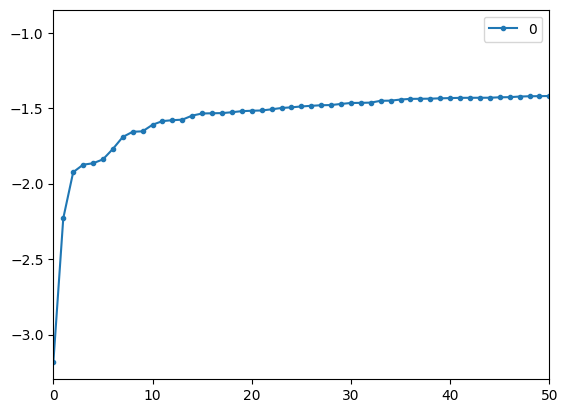

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [ ]:
th = np.sort(df_scores)[11]
lof_drop_index = train[df_scores < th].index
train.drop(lof_drop_index, inplace=True)
print(lof_drop_index)

Int64Index([15149, 15382, 16235, 19020, 28149, 49690, 49710, 49738, 50050,
            92897, 93255],
           dtype='int64')


In [ ]:
import seaborn as sns
def cat_summary(dataframe, cat_col, plot=False):
    print(pd.DataFrame({cat_col: dataframe[cat_col].value_counts(),
                        "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[cat_col], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [ ]:
print('Train Visualization')
print('Numerical Analysis')
for col in num_cols_train:
    num_summary(train, col, plot=True)
print('\n')
print('Categorical Analysis')
for col in cat_cols_train:
    cat_summary(train, col, plot=True)

In [ ]:
print('Test Visualization')
print('Numerical Analysis')
for col in num_cols_test:
    num_summary(test, col, plot=True)
print('\n')
print('Categorical Analysis')
for col in cat_cols_test:
    cat_summary(test, col, plot=True)

In [ ]:
selected_columns = ['menu1', 'menu2', 'menu3','menu4', 'menu5', 'menu6', 'menu7', 'menu8','menu9']
y_new = train[selected_columns].values

In [ ]:
y_new.shape

(94038, 9)

In [ ]:
train = train.drop(columns=['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['carrier'] = le.fit_transform(train['carrier'])
train['devicebrand'] = le.fit_transform(train['devicebrand'])
train['loyalty'] = le.fit_transform(train['loyalty'])

test['carrier'] = le.fit_transform(test['carrier'])
test['devicebrand'] = le.fit_transform(test['devicebrand'])
test['loyalty'] = le.fit_transform(test['loyalty'])

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import jaccard_score
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(train, y_new, test_size=0.2, random_state=42)

# Define the models and their parameter grids
model1 = MultiOutputRegressor(HistGradientBoostingRegressor())
param_grid1 = {
    "estimator__max_depth": [3, 5, 7, 9, 11],
    "estimator__max_iter": [200, 300, 500, 700, 1000]
}

model2 = MultiOutputRegressor(LGBMRegressor())
param_grid2 = {
    "estimator__max_depth": [3, 5, 7, 9, 11],
    "estimator__max_iter": [200, 300, 500, 700, 1000]
}

# Perform hyperparameter optimization for model1
grid_search_model1 = GridSearchCV(model1, param_grid1, cv=2)
grid_search_model1.fit(X_train, y_train)

# Perform hyperparameter optimization for model2
grid_search_model2 = GridSearchCV(model2, param_grid2, cv=2)
grid_search_model2.fit(X_train, y_train)

# Print the best hyperparameters for both models
print("Best hyperparameters for HistGradientBoostingRegressor:")
print(grid_search_model1.best_params_)

print("Best hyperparameters for LGBMRegressor:")
print(grid_search_model2.best_params_)

# Create the ensemble with the best models
best_model1 = grid_search_model1.best_estimator_
best_model2 = grid_search_model2.best_estimator_

ensemble_model = VotingRegressor(estimators=[('model1', best_model1), ('model2', best_model2)])
model = MultiOutputRegressor(ensemble_model).fit(X_train, y_train)
y_pred = model.predict(X_test)

top3_indices = np.argsort(y_pred, axis=1)[:, -3:]
result = np.zeros_like(y_pred)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1
jaccard = jaccard_score(y_test, result, average='samples')
print(f"Jaccard Score: {jaccard}")


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

model1 = HistGradientBoostingRegressor(max_depth = 3, max_iter = 100)
model2 = LGBMRegressor(max_depth = 3, max_iter = 500)

print('############## VotingRegressor ##############')
ensemble_model = VotingRegressor(estimators=[('model1', model1), ('model2', model2)])
model = MultiOutputRegressor(ensemble_model).fit(train, y_new)
y_pred = model.predict(test)

############## VotingRegressor ##############


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.237659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.793307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.060071
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.412759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.145812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.201014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.691082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.149135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.043940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.311066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38548
[LightGBM] [Info] Number of data points in the train set: 94038, number of used features: 159
[LightGBM] [Info] Start training from score 0.249101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
top3_indices = np.argsort(y_pred, axis=1)[:, -3:]
result = np.zeros_like(y_pred)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1

In [ ]:
result

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
result = result.astype(int)

In [ ]:
result

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
formatted_data = []
for row in result:
    row_str = ''.join(map(str, row))
    formatted_data.append(row_str)
#formatted_data

In [ ]:
birlesik_sutun = list(zip(test_id, formatted_data))
df = pd.DataFrame(birlesik_sutun, columns=['id', 'target'])

In [ ]:
df

,id,target
0,2e6105f5911256f4f6c4813ed,010101000
1,c56ad71dae0a5dbd3e7d36adc,010101000
2,4d02ea175f6581f0c6385311f,010001010
3,3412d27a86c286ba078fa935c,010001010
4,0203b561f6f7e10eafa46eefa,010001010
...,...,...
11950,7687113f46112edf4f56666ee,010100001
11951,5ff8eb7a06fd48b60dbc04f34,010101000
11952,ac23a7b9ad3e5d61e738c854b,010101000
11953,7da05018634ea2eee4b122756,010101000


In [ ]:
df= df.reset_index(drop=True)

In [ ]:
df

,id,target
0,2e6105f5911256f4f6c4813ed,010101000
1,c56ad71dae0a5dbd3e7d36adc,010101000
2,4d02ea175f6581f0c6385311f,010001010
3,3412d27a86c286ba078fa935c,010001010
4,0203b561f6f7e10eafa46eefa,010001010
...,...,...
11950,7687113f46112edf4f56666ee,010100001
11951,5ff8eb7a06fd48b60dbc04f34,010101000
11952,ac23a7b9ad3e5d61e738c854b,010101000
11953,7da05018634ea2eee4b122756,010101000


In [ ]:
submission = df.to_csv('submission.csv', index=False)


In [ ]:
def count_non_three_ones(df, column_name='target'):
    count = 0
    for target in df[column_name]:
        if str(target).count('1') != 3:
            count += 1
    return count

count_non_three_ones(df)

0

In [ ]:
from google.colab import files

# 'submission.csv' dosyasını Colab'dan indir
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>